## Collect Twitter Data
- https://www.freecodecamp.org/news/python-web-scraping-tutorial/
- https://twitter.com/search-advanced?lang=en

In [ ]:
!pip -q install snscrape
!pip -q install langcodes
!pip -q install language_data

In [ ]:
import snscrape.modules.twitter as sntwitter
from langcodes import *

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools
import collections

# import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

# sns.set(font_scale=1.5)
# sns.set_style("whitegrid")

from openpyxl.cell.cell import ILLEGAL_CHARACTERS_RE
from openpyxl import *

plt.rcParams.update({'font.size': 14})


In [ ]:
def search_tw(word):
    # Creating list to append tweet data to
    attributes_container = []

    # Using TwitterSearchScraper to scrape data and append tweets to list

    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(
        f'(#{word}) until:2023-02-15 since:2017-01-01').get_items()):
        if i>1000:
            break
        attributes_container.append([tweet.user.username,tweet.user.displayname , tweet.date, 
                                     tweet.likeCount, tweet.sourceLabel, tweet.content, 
                                     tweet.lang,tweet.coordinates, tweet.place])

    # Creating a dataframe to load the list
    tweets_df = pd.DataFrame(attributes_container, columns=["User", "Name", "Date Created", 
                                                            "Number of Likes", "Source of Tweet", "Tweet", 
                                                            "Language", "Coordinates","place"])

    tweets_df["cleanTweet"] = tweets_df["Tweet"].apply(lambda s: re.sub(r'(?:\@\w+)','', s))# remove string like: @kmkk 
    # tweets_df["cleanTweet"] = tweets_df["cleanTweet"].apply(lambda s: re.sub(r'(?:[a-zA-Z]+)','', s))# remove english word
    tweets_df["cleanTweet"] = tweets_df["cleanTweet"].apply(lambda s: re.sub(  r'([$@&!~#^*+=-_]+)'    ,'', s)) 
    # tweets_df = tweets_df[tweets_df['Language'] ==  "ar"]
    tweets_df['Date Created'] = tweets_df['Date Created'].apply(lambda a: pd.to_datetime(a).date())
    print(tweets_df)
    # tweets_df.to_excel(f'TwitterData_{word}.xlsx')
    return tweets_df 

In [ ]:
df1=search_tw('blockchain')
df2=search_tw('NLP')
df3=search_tw('RPA')

                User                   Name Date Created  Number of Likes  \
0       Gloria1Ekene           Ekene Gloria   2023-02-14                0   
1      DanCryptoReal                    Dan   2023-02-14                1   
2           vdimitrv      Valentin Dimitrov   2023-02-14                4   
3           RenzoDGB              Renzo.dgb   2023-02-14               79   
4         USDCAlerts           $USDC Alerts   2023-02-14                1   
...              ...                    ...          ...              ...   
996       ClemZiroli        Clem Ziroli III   2023-02-14                0   
997      nyan_lou618          Louis Pearson   2023-02-14                0   
998   decryptosector           CryptoSector   2023-02-14                0   
999      Chris200427  Christian ❤️\Maincard   2023-02-14                0   
1000   coinlivespace          CoinLIVEspace   2023-02-14                0   

                 Source of Tweet  \
0            Twitter for Android   
1  

In [ ]:
df1['Type']='BlockChain'
df2['Type']='NLP'
df3['Type']='RPA'

In [ ]:
df = pd.concat([df1,df2,df3])
df.to_excel('tw_df.xlsx', index=False)

### Read Dataset

In [ ]:
df = pd.read_excel('tw_df.xlsx')
# excel_df = excel_df.drop('Unnamed: 0', axis=1, inplace=True)
# print whole sheet data
df.head(5)


,User,Name,Date Created,Number of Likes,Source of Tweet,Tweet,Language,Coordinates,place,cleanTweet,Type
0,Gloria1Ekene,Ekene Gloria,2023-02-14,0,Twitter for Android,@AltGemHunter @dojimanetwork got outstanding p...,en,NaN,NaN,got outstanding potentials.\n will enable mu...,BlockChain
1,DanCryptoReal,Dan,2023-02-14,1,Twitter for iPhone,"Chia's creator, @bramcohen is the inventor of ...",en,NaN,NaN,"hia's creator, is the inventor of itorrent, w...",BlockChain
2,vdimitrv,Valentin Dimitrov,2023-02-14,4,Twitter for Android,#EBC23 we are coming! #Barcelona #crypto #bloc...,en,"Coordinates(longitude=2.0524766, latitude=41.3...","Place(id='1a27537478dd8e38', fullName='Barcelo...",23 we are coming arcelona crypto blockchain cr...,BlockChain
3,RenzoDGB,Renzo.dgb,2023-02-14,79,Twitter for Android,Look what just arrived! #DigiByte #Blockchain ...,en,NaN,NaN,ook what just arrived igiyte lockchain http...,BlockChain
4,USDCAlerts,$USDC Alerts,2023-02-14,1,USDC Alerts,"💰$10,000,000.00 $USDC transferred from 0xb4f4…...",en,NaN,NaN,"💰10,000,000.00 transferred from 0xb4f4…d969 t...",BlockChain


In [ ]:
df['cleanTweet'].to_list()

['  got outstanding potentials.\n will enable multiple blockchains to interact with each other, either for transferring assets or relaying data. \nblockchain \nojimaetwork',
 "hia's creator,  is the inventor of itorrent, which gives the project a lot of credibility and ensures that the team behind it has a strong technical background. lockchain rypto",
 '23 we are coming arcelona crypto blockchain credefi defi smefinance https://t.co/hyug0',
 'ook what just arrived igiyte lockchain    https://t.co/fwtmo3g',
 '💰10,000,000.00  transferred from 0xb4f4…d969 to 0xa9d1…3e43\n\nee the full transaction: https://t.co/6at5wh\n\ncrypto ethereum blockchain',
 ' ryptort ryptowitter ei thereum itcoin ryptoews ryptoommunity lockchain igitalrt ecentralization  igitalurrency ltcoins  rypto thereum lockchain itcoin ryptocurrency',
 "ortal  - ow in final stages of pps evelopment. his will allow  application to be built on top of ortal's infrastructure.\n\nortal lockchain nfrastructurefheuture\n\nou think

In [ ]:
# excel_df.drop_duplicates().count()
df.drop_duplicates(subset=['cleanTweet'])

,User,Name,Date Created,Number of Likes,Source of Tweet,Tweet,Language,Coordinates,place,cleanTweet,Type
0,Gloria1Ekene,Ekene Gloria,2023-02-14,0,Twitter for Android,@AltGemHunter @dojimanetwork got outstanding p...,en,NaN,NaN,got outstanding potentials.\n will enable mu...,BlockChain
1,DanCryptoReal,Dan,2023-02-14,1,Twitter for iPhone,"Chia's creator, @bramcohen is the inventor of ...",en,NaN,NaN,"hia's creator, is the inventor of itorrent, w...",BlockChain
2,vdimitrv,Valentin Dimitrov,2023-02-14,4,Twitter for Android,#EBC23 we are coming! #Barcelona #crypto #bloc...,en,"Coordinates(longitude=2.0524766, latitude=41.3...","Place(id='1a27537478dd8e38', fullName='Barcelo...",23 we are coming arcelona crypto blockchain cr...,BlockChain
3,RenzoDGB,Renzo.dgb,2023-02-14,79,Twitter for Android,Look what just arrived! #DigiByte #Blockchain ...,en,NaN,NaN,ook what just arrived igiyte lockchain http...,BlockChain
4,USDCAlerts,$USDC Alerts,2023-02-14,1,USDC Alerts,"💰$10,000,000.00 $USDC transferred from 0xb4f4…...",en,NaN,NaN,"💰10,000,000.00 transferred from 0xb4f4…d969 t...",BlockChain
...,...,...,...,...,...,...,...,...,...,...,...
2998,SYSTEMTECINC,SYSTEMTEC CAREERS,2023-02-09,0,Twitter Web App,We're looking for a talented RPA/Business Inte...,en,NaN,NaN,e're looking for a talented /usiness ntelligen...,RPA
2999,roboflows,Roboflows,2023-02-09,0,Twitter Web App,Unattended en Attended - Roboflows kan zowel c...,nl,NaN,NaN,nattended en ttended - oboflows kan zowel cent...,RPA
3000,Apps4urMobile,Mobile Apps/Application,2023-02-09,3,Buffer,Robotic Process Automation(RPA) Practice Test\...,en,NaN,NaN,obotic rocess utomation() ractice est\n\nhttps...,RPA
3001,FinderCard,Baseball Card Finder,2023-02-09,0,baseballcardfinder,2022 Panini Flawless #RPA-OC Oneil Cruz RC Roo...,en,NaN,NaN,2022 anini lawless - neil ruz ookie atch uto ...,RPA


In [ ]:
df['Date Created'].value_counts()

2023-02-14    1573
2023-02-13     608
2023-02-12     407
2023-02-10     189
2023-02-11     158
2023-02-09      68
Name: Date Created, dtype: int64

In [ ]:
df = df.drop(['Coordinates','place','Name','User','Tweet'], axis=1)

In [ ]:
df.head(10)

,Date Created,Number of Likes,Source of Tweet,Language,cleanTweet,Type
0,2023-02-14,0,Twitter for Android,en,got outstanding potentials.\n will enable mu...,BlockChain
1,2023-02-14,1,Twitter for iPhone,en,"hia's creator, is the inventor of itorrent, w...",BlockChain
2,2023-02-14,4,Twitter for Android,en,23 we are coming arcelona crypto blockchain cr...,BlockChain
3,2023-02-14,79,Twitter for Android,en,ook what just arrived igiyte lockchain http...,BlockChain
4,2023-02-14,1,USDC Alerts,en,"💰10,000,000.00 transferred from 0xb4f4…d969 t...",BlockChain
5,2023-02-14,3,Twitter Web App,qht,ryptort ryptowitter ei thereum itcoin ryptoew...,BlockChain
6,2023-02-14,5,Twitter Web App,en,ortal - ow in final stages of pps evelopment....,BlockChain
7,2023-02-14,0,Twitter Web App,en,ttention all developers and blockchain enthus...,BlockChain
8,2023-02-14,4,Twitter Web App,en,1/\n quick look at iquid taking on the thereum...,BlockChain
9,2023-02-14,0,Twitter for iPhone,en,ololol probably would consider earth a securi...,BlockChain


In [ ]:
col_list = df["cleanTweet"].values.tolist()
print(col_list)

['  got outstanding potentials.\n will enable multiple blockchains to interact with each other, either for transferring assets or relaying data. \nblockchain \nojimaetwork', "hia's creator,  is the inventor of itorrent, which gives the project a lot of credibility and ensures that the team behind it has a strong technical background. lockchain rypto", '23 we are coming arcelona crypto blockchain credefi defi smefinance https://t.co/hyug0', 'ook what just arrived igiyte lockchain    https://t.co/fwtmo3g', '💰10,000,000.00  transferred from 0xb4f4…d969 to 0xa9d1…3e43\n\nee the full transaction: https://t.co/6at5wh\n\ncrypto ethereum blockchain', ' ryptort ryptowitter ei thereum itcoin ryptoews ryptoommunity lockchain igitalrt ecentralization  igitalurrency ltcoins  rypto thereum lockchain itcoin ryptocurrency', "ortal  - ow in final stages of pps evelopment. his will allow  application to be built on top of ortal's infrastructure.\n\nortal lockchain nfrastructurefheuture\n\nou think s are

In [ ]:
import itertools
import collections

lst=['blockchain','NLP','RPA']
# for tx in col_list:
col_list2 = ''.join(col_list) 

# List of all words across tweets
df_x = col_list2.split()

# Create counter
counts_no_urls = collections.Counter(df_x)

bc = counts_no_urls['blockchain']
nlp = counts_no_urls['nlp']
rpa = counts_no_urls['rpa']
print(bc,nlp,rpa)

656 171 139


In [ ]:
type_df = pd.DataFrame({'BlockChain': bc, 'NLP':nlp, 'RBA':rpa}.items(),columns=['Type','Count'])
type_df.head()

,Type,Count
0,BlockChain,656
1,NLP,171
2,RBA,139


In [ ]:
fig = px.pie(type_df, values='Count', names='Type', title='The frequency words in Twitter.')
fig.show()

In [ ]:
df['Language'].value_counts() 

en     2430
ja      167
es       97
qme      77
nl       36
qht      30
fr       30
de       25
und      18
in       16
pt       15
it       11
tr        9
ca        6
ht        5
pl        5
tl        4
ru        3
ar        3
th        3
hi        3
ro        2
el        2
cy        2
fa        1
uk        1
et        1
fi        1
Name: Language, dtype: int64

In [ ]:
df_b = df.groupby(['Language'])['Language'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(10)

top_lang = df_b['Language'].to_list()

df_b['Language'] = df_b['Language'].apply(lambda x:Language.make(language=x).display_name())
df_b 

,Language,count
5,English,2430
15,Japanese,167
6,Spanish,97
20,Unknown language [qme],77
16,Dutch,36
19,Unknown language [qht],30
10,French,30
3,German,25
27,Unknown language,18
13,Indonesian,16


In [ ]:
df[df['Language'] == 'qme']['cleanTweet'].to_list()[70]

'ifeoah positivevibes lifecoaching appiness selfdevelopmentt mindsetcoach coachinglife instagood growth nlp women wellness quotes positivity mentalhealthawareness  gratitude transformation spirituality change selfhelp training iveviously https://t.co/o614rffi'

In [ ]:
fg = px.bar(df_b, x='count', y='Language' , title='Language vs Count', color= 'Language')
fg.show() 

In [ ]:
top_lang

['en', 'ja', 'es', 'qme', 'nl', 'qht', 'fr', 'de', 'und', 'in']

In [ ]:
df['stat'] = df['Language'].apply(lambda x: x if x in top_lang else 'None')
df = df[df['stat'] != 'None'] 

In [ ]:
df['Language'].value_counts()

en     2430
ja      167
es       97
qme      77
nl       36
qht      30
fr       30
de       25
und      18
in       16
Name: Language, dtype: int64

In [ ]:
x=df.groupby('Type')['Language'].value_counts().to_frame('Count')
x 

Count
Type       Language       
BlockChain en          770
           es           58
           qme          50
           qht          23
           nl           21
           fr           15
           in           12
           und          12
           de            5
           ja            4
NLP        en          844
           ja           76
           qme          22
           fr           10
           es            7
           de            6
           qht           4
           nl            3
           und           3
           in            1
RPA        en          816
           ja           87
           es           32
           de           14
           nl           12
           fr            5
           qme           5
           in            3
           qht           3
           und           3

In [ ]:
xdf = x.reset_index(level=0)
xdf['language'] = xdf.index
xdf['language'] = xdf['language'].apply(lambda x:Language.make(language=x).display_name())

xdf.head(2)

,Type,Count,language
Language,,,
en,BlockChain,770,English
es,BlockChain,58,Spanish


<Figure size 1440x720 with 0 Axes>

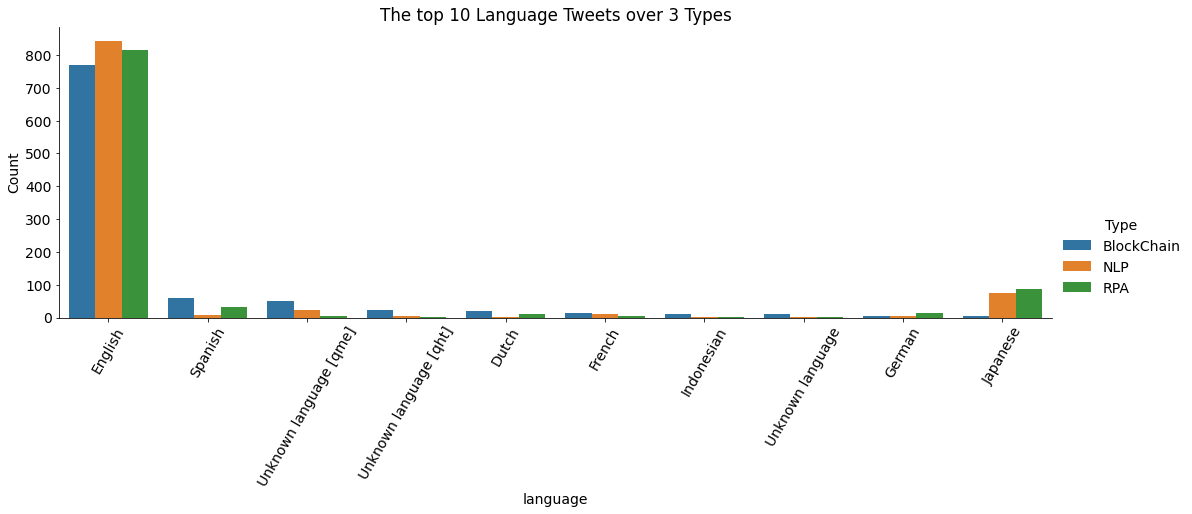

In [ ]:
plt.figure(figsize=(20,10))

sns.catplot(x = 'language', y='Count', hue = 'Type',data=xdf, kind='bar', aspect=3)
plt.title('The top 10 Language Tweets over 3 Types')
plt.xticks(rotation=60); 

In [ ]:
df

,Date Created,Number of Likes,Source of Tweet,Language,cleanTweet,Type,stat
0,2023-02-14,0,Twitter for Android,en,got outstanding potentials.\n will enable mu...,BlockChain,en
1,2023-02-14,1,Twitter for iPhone,en,"hia's creator, is the inventor of itorrent, w...",BlockChain,en
2,2023-02-14,4,Twitter for Android,en,23 we are coming arcelona crypto blockchain cr...,BlockChain,en
3,2023-02-14,79,Twitter for Android,en,ook what just arrived igiyte lockchain http...,BlockChain,en
4,2023-02-14,1,USDC Alerts,en,"💰10,000,000.00 transferred from 0xb4f4…d969 t...",BlockChain,en
...,...,...,...,...,...,...,...
2998,2023-02-09,0,Twitter Web App,en,e're looking for a talented /usiness ntelligen...,RPA,en
2999,2023-02-09,0,Twitter Web App,nl,nattended en ttended - oboflows kan zowel cent...,RPA,nl
3000,2023-02-09,3,Buffer,en,obotic rocess utomation() ractice est\n\nhttps...,RPA,en
3001,2023-02-09,0,baseballcardfinder,en,2022 anini lawless - neil ruz ookie atch uto ...,RPA,en


In [ ]:
dfx2 = df.groupby(['Date Created', 'Type'])['Date Created'].value_counts().to_frame("Count")
dfx2 = dfx2.reset_index(level=0)
dfx2['Date_Created'] = dfx2['Date Created']
dfx2['Type'] = list(map(lambda x:x[0], dfx2.index.values))
dfx2['Date_Created'] = dfx2['Date_Created'].dt.date 
dfx2.head(2)

Date Created  Count Date_Created Type
Type Date Created                                      
RPA  2023-02-09     2023-02-09     68   2023-02-09  RPA
     2023-02-10     2023-02-10    181   2023-02-10  RPA

Text(0.5, 1.0, 'The number of appearances of the three species changed during a week\u200f\u200f.')

<Figure size 1440x720 with 0 Axes>

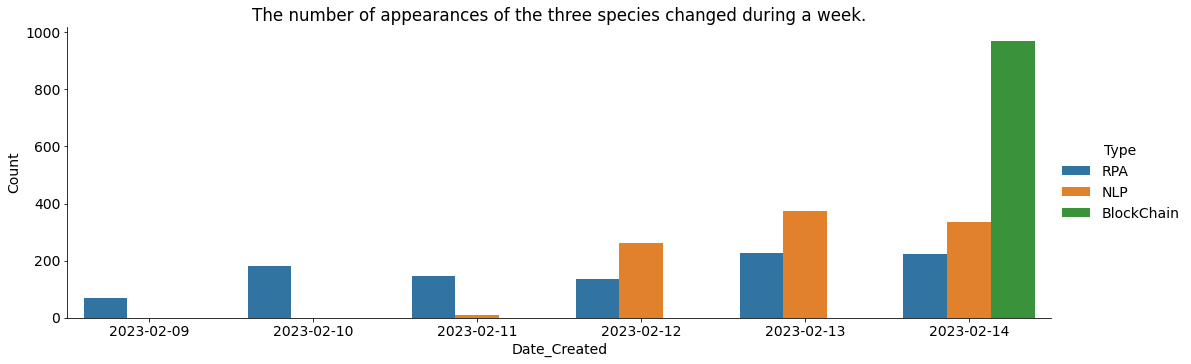

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 14})
sns.catplot(x = 'Date_Created', y='Count', hue = 'Type',data=dfx2, kind='bar', aspect=3)
plt.title('The number of appearances of the three species changed during a week‏‏.')
#plt.xticks(rotation=60); 

In [ ]:
dfx2 = df.groupby('Type')['Number of Likes'].sum().to_frame("Count Likes")
dfx2 = dfx2.reset_index(level=0) 
dfx2 

,Type,Count Likes
0,BlockChain,7157
1,NLP,3142
2,RPA,1769


In [ ]:
fig = px.pie(dfx2, values='Count Likes', names='Type', title='The number of likes based on the three types‏.')
fig.show()